In [2]:
# Import librăriile necesare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# conectarea la Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# calea spre fisier
path="/content/drive/MyDrive/dataset.csv"

In [4]:
# Citim dataset-ul
data = pd.read_csv(path, encoding='ISO-8859-1')

In [5]:
# Afișăm primele rânduri pentru a înțelege structura datelor
print("Primele 5 rânduri din dataset:")
print(data.head())

Primele 5 rânduri din dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

     InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-10 8:26       2.55     17850.0  United Kingdom  
1  12-01-10 8:26       3.39     17850.0  United Kingdom  
2  12-01-10 8:26       2.75     17850.0  United Kingdom  
3  12-01-10 8:26       3.39     17850.0  United Kingdom  
4  12-01-10 8:26       3.39     17850.0  United Kingdom  


In [6]:
# Verificăm informațiile generale despre dataset
print("\nInformații generale despre dataset:")
print(data.info())


Informații generale despre dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [7]:
# Analizăm valorile lipsă
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)
print("\nValori lipsă în dataset:")
print(missing_data_summary)


Valori lipsă în dataset:
             Missing Values  Percentage (%)
CustomerID           135080       24.926694
Description            1454        0.268311
InvoiceNo                 0        0.000000
StockCode                 0        0.000000
Quantity                  0        0.000000
InvoiceDate               0        0.000000
UnitPrice                 0        0.000000
Country                   0        0.000000


Preprocesarea datelor

In [8]:
# Eliminăm rândurile fără 'Description' (procent mic de valori lipsă)
data = data.dropna(subset=['Description'])

In [9]:
# Completăm valorile lipsă din 'CustomerID' cu 0 (anonim)
data['CustomerID'] = data['CustomerID'].fillna(0)

<ipython-input-9-ec1f460466ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID'] = data['CustomerID'].fillna(0)


In [10]:
# Convertim coloana 'InvoiceDate' în format datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


<ipython-input-10-febd1aafaea9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [11]:
# Eliminăm tranzacțiile cu cantități negative sau prețuri incorecte
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [12]:
# Standardizăm descrierile produselor prin transformarea în litere mici
data['Description'] = data['Description'].str.lower()

<ipython-input-12-eddf7111d783>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].str.lower()


In [13]:
# Creăm o coloană nouă, 'TotalPrice', care reprezintă valoarea totală a tranzacției
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

<ipython-input-13-e935cbc104e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


In [14]:
# Afișăm 5 rânduri din setul de date după preprocesare
print("\nPrimele 5 rânduri după preprocesare:")
print(data.head())


Primele 5 rânduri după preprocesare:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [15]:
# Statistici descriptive
print("\nStatistici descriptive pentru coloanele numerice:")
print(data[['Quantity', 'UnitPrice', 'TotalPrice']].describe())


Statistici descriptive pentru coloanele numerice:
            Quantity      UnitPrice     TotalPrice
count  530104.000000  530104.000000  530104.000000
mean       10.542037       3.907625      20.121871
std       155.524124      35.915681     270.356743
min         1.000000       0.001000       0.001000
25%         1.000000       1.250000       3.750000
50%         3.000000       2.080000       9.900000
75%        10.000000       4.130000      17.700000
max     80995.000000   13541.330000  168469.600000


Grafice pentru analiza vizuală

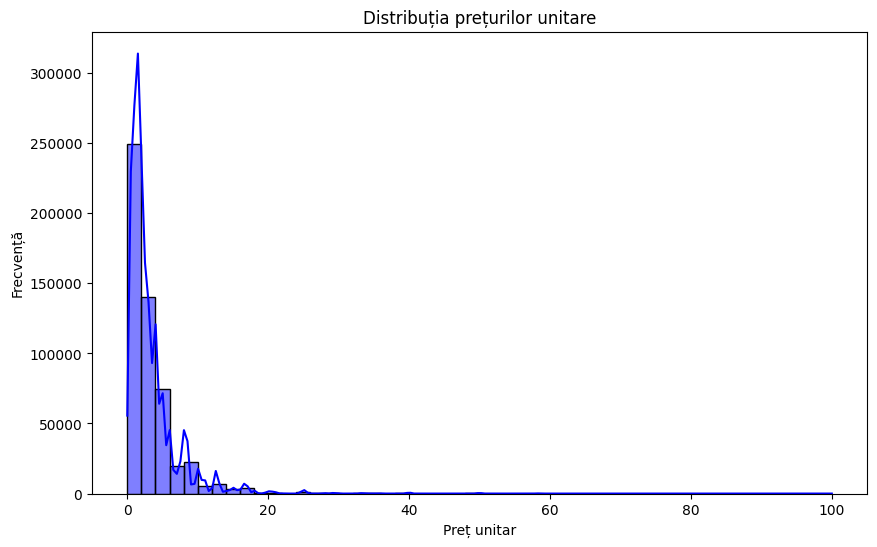

In [16]:
# 1. Distribuția prețurilor unitare
plt.figure(figsize=(10, 6))
filtered_data = data[data['UnitPrice'] <= 100]  # Excludem valorile extreme (>100)
sns.histplot(filtered_data['UnitPrice'], bins=50, kde=True, color='blue')
plt.title("Distribuția prețurilor unitare")
plt.xlabel("Preț unitar")
plt.ylabel("Frecvență")
plt.show()

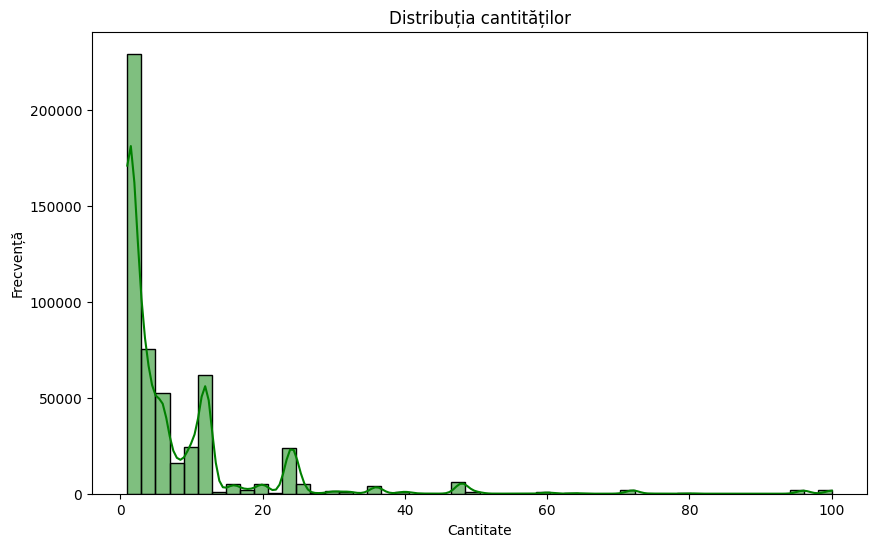

In [17]:
# 2. Distribuția cantităților
plt.figure(figsize=(10, 6))
filtered_data = data[data['Quantity'] <= 100]  # Excludem cantitățile foarte mari (>100)
sns.histplot(filtered_data['Quantity'], bins=50, kde=True, color='green')
plt.title("Distribuția cantităților")
plt.xlabel("Cantitate")
plt.ylabel("Frecvență")
plt.show()

<ipython-input-18-27389438d730>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


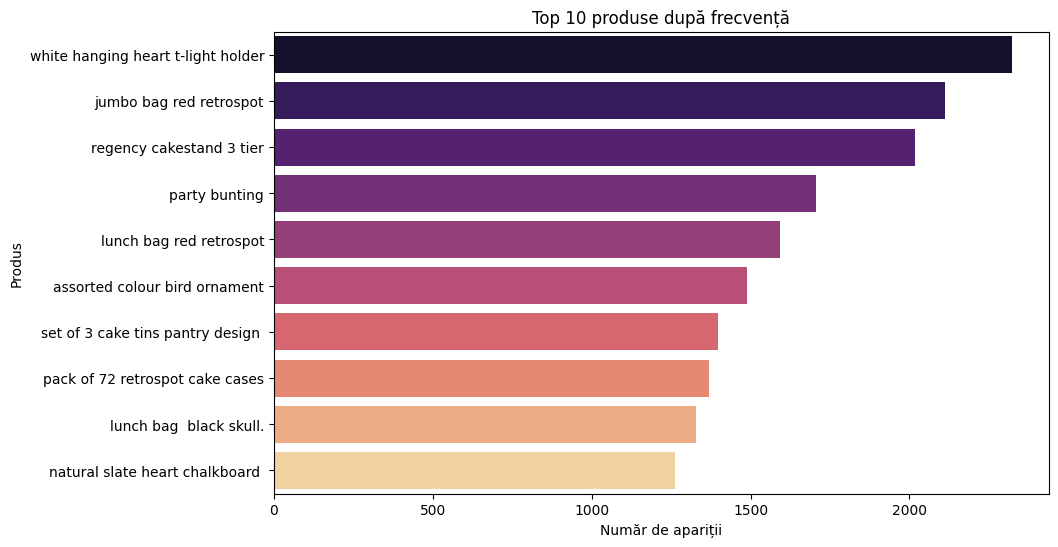

In [18]:
# 3. Top 10 produse după frecvență
top_products = data['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 produse după frecvență")
plt.xlabel("Număr de apariții")
plt.ylabel("Produs")
plt.show()

<ipython-input-19-bf25e8175dae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=np.log10(country_sales.values), palette="plasma")


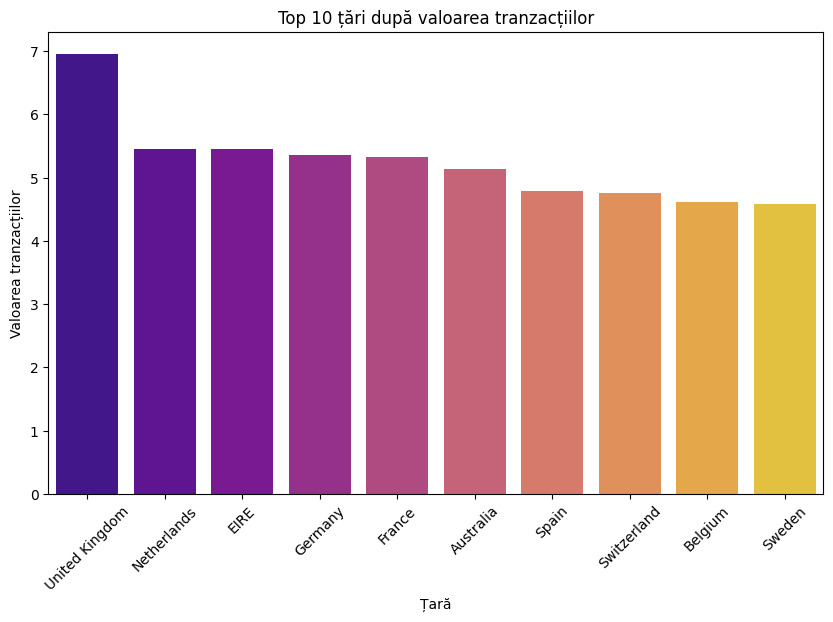

In [19]:
# 4. Top 10 țări după valoarea tranzacțiilor (scară logaritmică)
country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.index, y=np.log10(country_sales.values), palette="plasma")
plt.title("Top 10 țări după valoarea tranzacțiilor")
plt.xlabel("Țară")
plt.ylabel("Valoarea tranzacțiilor")
plt.xticks(rotation=45)
plt.show()

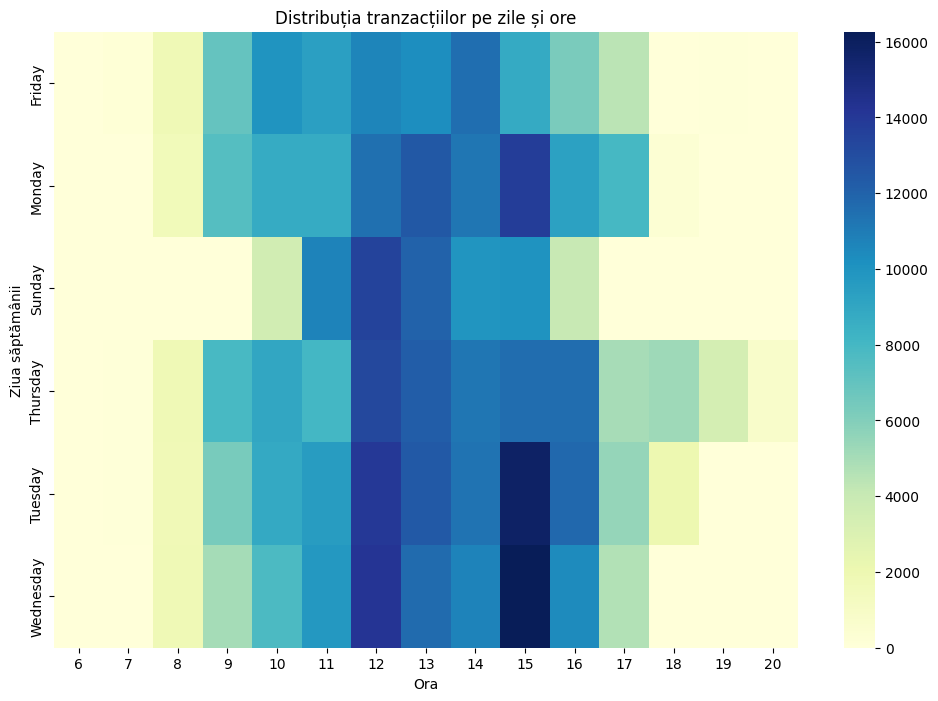

In [20]:
# 5. Distribuția tranzacțiilor pe zile și ore
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
time_heatmap = data.pivot_table(index='DayOfWeek', columns='Hour', values='InvoiceNo', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(time_heatmap, cmap='YlGnBu', annot=False)
plt.title("Distribuția tranzacțiilor pe zile și ore")
plt.xlabel("Ora")
plt.ylabel("Ziua săptămânii")
plt.show()

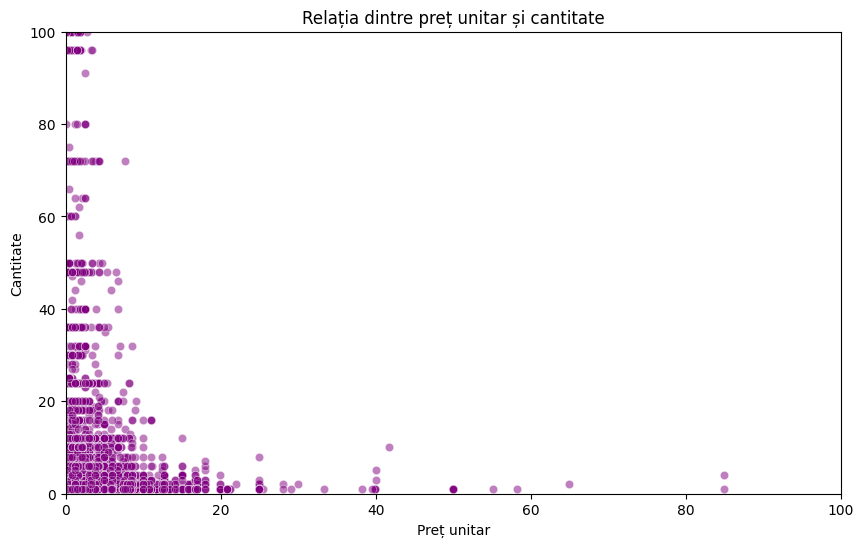

In [21]:
# 6. Relația dintre cantitate și preț unitar (eșantionare și limite pe axe)
sampled_data = data.sample(10000)  # Luăm un eșantion pentru claritate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=sampled_data, alpha=0.5, color='purple')
plt.title("Relația dintre preț unitar și cantitate")
plt.xlabel("Preț unitar")
plt.ylabel("Cantitate")
plt.xlim(0, 100)  # Limităm axa X
plt.ylim(0, 100)  # Limităm axa Y
plt.show()

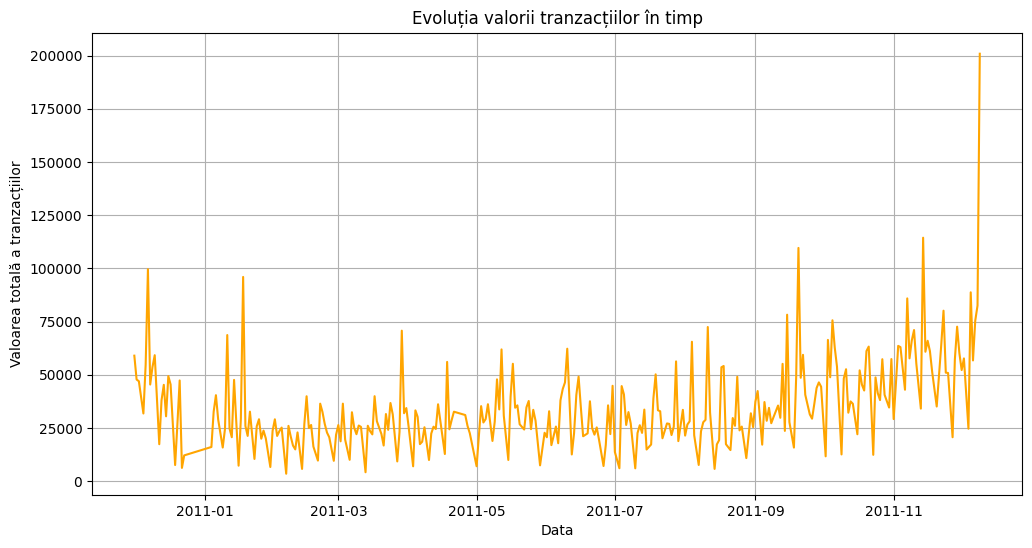

In [22]:
# 7. Evoluția valorii tranzacțiilor în timp
sales_over_time = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot(color='orange')
plt.title("Evoluția valorii tranzacțiilor în timp")
plt.xlabel("Data")
plt.ylabel("Valoarea totală a tranzacțiilor")
plt.grid()
plt.show()


<ipython-input-23-602e5378958d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_country.index, y=avg_sales_country.values, palette="coolwarm")


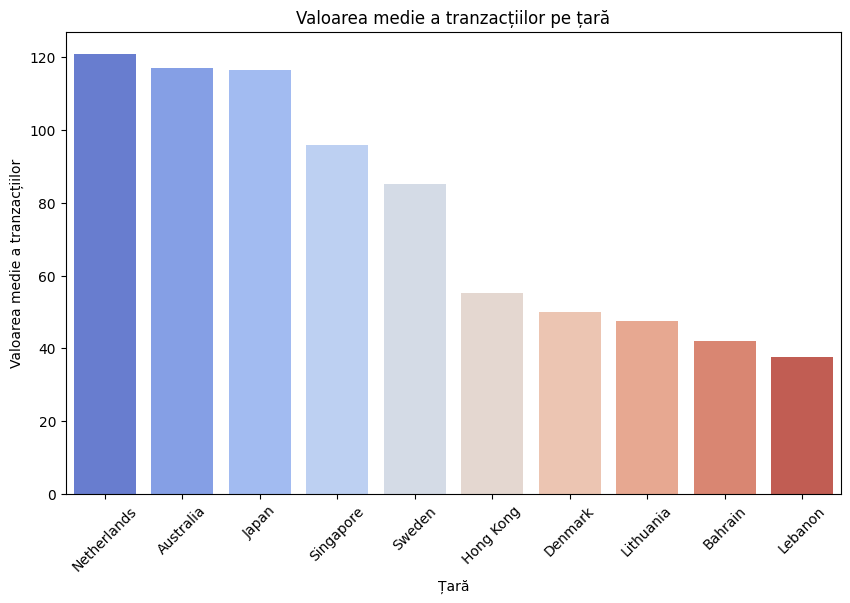

In [23]:
# 8. Valoarea medie a tranzacțiilor pe țară
avg_sales_country = data.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_country.index, y=avg_sales_country.values, palette="coolwarm")
plt.title("Valoarea medie a tranzacțiilor pe țară")
plt.xlabel("Țară")
plt.ylabel("Valoarea medie a tranzacțiilor")
plt.xticks(rotation=45)
plt.show()

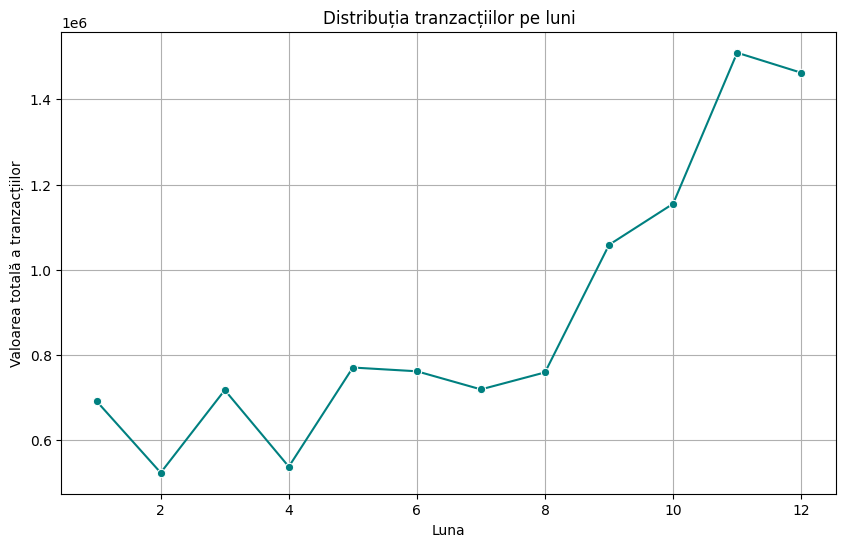

In [24]:
# 9. Distribuția tranzacțiilor pe luni
data['Month'] = data['InvoiceDate'].dt.month
monthly_sales = data.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='teal')
plt.title("Distribuția tranzacțiilor pe luni")
plt.xlabel("Luna")
plt.ylabel("Valoarea totală a tranzacțiilor")
plt.grid()
plt.show()